# Statistics Essential Module 4 
# Investment Assignment
# Rajesh Suguru

###### *import pandas, and numpy Libraries*


In [545]:
import pandas as pd
import numpy as np
import requests, bs4
pd.options.display.float_format = '{:.2f}'.format #Very important to display mean in float format

#### Load the companies, rounds and mapping data into two data frames and name them companies, rounds2 and mapping respectively.


In [546]:
companies = pd.read_csv("companies.txt",sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv",sep=",", encoding = "ISO-8859-1")
mapping = pd.read_csv("mapping.csv",sep=",", encoding = "ISO-8859-1")

###### Data Analysis
> ###### #isnull() for companies
> companies.isnull()
> ###### #isnull() for rounds2
> rounds2.isnull()

In [547]:
# summing up the missing values (column-wise) for companies
companies.isnull().sum() #founded_at got 15221 null values

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [548]:
# summing up the missing values (column-wise) for rounds2
rounds2.isnull().sum() #raised_amount_usd got 19990 null values , funding_round_code 83809 null values

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

###### **Data Analysis Companies and Rounds2**
> ###### sum it up to check how many rows have all missing values for companies
> companies.isnull().all(axis=1).sum() #There are no rows with all the missing values in companies
> ###### sum it up to check how many rows have all missing values for rounds2
> rounds2.isnull().all(axis=1).sum() #There are no rows with all the missing values in rounds2
> #### sum of misisng values in each row for companies
> companies.isnull().sum(axis=1)
> #### sum of misisng values in each row for rounds2
> rounds2.isnull().sum(axis=1)
> #summing up the missing values (column-wise) for companies <br>
> round(100*(companies.isnull().sum()/len(companies.index)), 4) #Noticed 23% of missing values for founded_at
> #summing up the missing values (column-wise) for rounds2 <br>
> round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2) #Noticed 17% of missing values for raised_amount_usd
> companies[companies.isnull().sum(axis=1) >= 5] # Noticed 3998 rows with the missing values for greaterthan 5 columns in companies
> rounds2[rounds2.isnull().sum(axis=1) > 5] # Noticed NO rows with the missing values for greaterthan 5 columns
> ###### rounds2.head()
> ###### print(rounds2['company_permalink'].count()) #Total count of companies in rounds2 file is 114949
> ###### print(rounds2['company_permalink'].str.lower().nunique()) #Unique compnaies in rounds2 file is 66370
> ###### companies.head()
> ###### print(companies['permalink'].count()) #Total count of companies in companies file is 66368
> ###### print(companies['permalink'].str.lower().nunique()) #Unique compnaies in companies file is 66368

#### Table -1.1 Q1. How many unique companies are present in rounds2?

In [549]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()
rounds2.company_permalink.nunique()
print(rounds2.company_permalink.nunique()) #Unique compnaies in rounds2 file is 66370

66370


#### Table -1.1 Q2. How many unique companies are present in the companies file?

In [550]:
companies['permalink'] = companies['permalink'].str.upper()
companies.permalink.nunique()
print(companies.permalink.nunique()) #Unique compnaies in companies file is 66368

66368


####  Table -1.1 Q3. In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

> ####  Answer : permalink

##### Table -1.1 Q4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

> ####  Answer : Y

In [551]:
diff_rounds2_companies = rounds2[~rounds2.company_permalink.str.upper().isin(companies.permalink.str.upper())].company_permalink.str.upper()
diff_rounds2_companies

29597                               /ORGANIZATION/E-CÃBICA
31863          /ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ
45176                  /ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦
58473                /ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ
101036    /ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...
109969               /ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ
113839                   /ORGANIZATION/ZENGAME-Ç¦
Æ¸¸Ç§Æ
Name: company_permalink, dtype: object

In [552]:
diff_companies_rounds2 = companies[~companies.permalink.str.upper().isin(rounds2.company_permalink.str.upper())].permalink.str.upper()
diff_companies_rounds2

16827                              /ORGANIZATION/E-CÃBICA
18197         /ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇŸ³Æ¸¸Æ
26139                 /ORGANIZATION/HUIZUCHE-COM-Æ Ç§È½¦
58344    /ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈÄ¿¡Æ¯Ç...
65778                   /ORGANIZATION/ZENGAME-Ç¦
Æ¸¸Ç§Æ
Name: permalink, dtype: object

####  Table -1.1 Q5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [553]:
master_frame = pd.merge(rounds2, companies, left_on=rounds2['company_permalink'].str.upper(), right_on=companies['permalink'].str.upper(), how='left')
master_frame.shape

(114949, 17)

####  Data Analysis and Data Cleaning of master_frame
> #master_frame.head(10)
> #master_frame.describe()
> #master_frame.info()
> #master_frame.columns

In [554]:
master_frame.isnull().any(axis=0)

key_0                      False
company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                   True
name                        True
homepage_url                True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [555]:
percentage_missing_values = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage_missing_values

key_0                      0.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.01
name                       0.01
homepage_url               5.34
category_list              2.97
status                     0.01
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.86
dtype: float64

###### Noticed 72% missing values in funding_round_code required clean up 
###### Noticed  around 18% missing values in funding_round_code, raised_amount_usd  . Need to handle it.    
###### Drop funding_round_code


In [556]:
master_frame = master_frame.drop('funding_round_code', axis=1)
percentage_missing_values = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage_missing_values

key_0                      0.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.01
name                       0.01
homepage_url               5.34
category_list              2.97
status                     0.01
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.86
dtype: float64

###### Clean up master_frame by rows . Remove the rowns with > 5 values 

> 2832 rows will be cleaned up


In [557]:
master_frame[master_frame.isnull().sum(axis=1) > 5]

key_0  \
79                        /ORGANIZATION/115-NETWORK-DISKS   
145                             /ORGANIZATION/1800DIAPERS   
201                              /ORGANIZATION/2-LADOSHKI   
263                                 /ORGANIZATION/24-QUAN   
264                                 /ORGANIZATION/24-QUAN   
275                                /ORGANIZATION/24MED-SP   
291                                  /ORGANIZATION/29WEST   
321                                    /ORGANIZATION/2MEE   
346                       /ORGANIZATION/2WEB-TECHNOLOGIES   
366                   /ORGANIZATION/30SECONDSTOFLY-CLAIRE   
393                        /ORGANIZATION/365-GOOD-TEACHER   
439                                /ORGANIZATION/3D-FORMS   
447     /ORGANIZATION/3D-INTELLIGENT-PATHOLOGICAL-MEDI...   
455                               /ORGANIZATION/3D-SIMO-2   
510                                     /ORGANIZATION/3IS   
533                              /ORGANIZATION/3POINTDATA   
571                           /ORGANIZATION/4-ANTIBODY-AG   
624                                 /ORGANIZATION/4ENERGY   
626                         /ORGANIZATION/4FRONT-SECURITY   
642                    /ORGANIZATION/4MED-CENTRA-MEDYCZNE   
657                                /ORGANIZATION/4SCREENS   
660                         /ORGANIZATION/4TELL-SOLUTIONS   
708                             /ORGANIZATION/51-QIANGZUO   
759                                   /ORGANIZATION/5DPNP   
790                                  /ORGANIZATION/66-COM   
851                                  /ORGANIZATION/72XUAN   
881                              /ORGANIZATION/7TM-PHARMA   
905                              /ORGANIZATION/88-FAMIBIO   
907                                  /ORGANIZATION/88TC88   
1015                  /ORGANIZATION/9TH-DIMENSION-BIOTECH   
...                                                   ...   
113576                               /ORGANIZATION/ZAPNIP   
113622                            /ORGANIZATION/ZARTHCODE   
113650                              /ORGANIZATION/ZAZENGO   
113674                        /ORGANIZATION/ZDROWEGENY-PL   
113710                         /ORGANIZATION/ZEBRA-MOBILE   
113722                          /ORGANIZATION/ZEDIRA-GMBH   
113768                         /ORGANIZATION/ZEIS-EXCELSA   
113770                       /ORGANIZATION/ZELENA-POSTA-2   
113798                               /ORGANIZATION/ZENBOX   
113799                               /ORGANIZATION/ZENBOX   
113832                               /ORGANIZATION/ZENEDY   
113839                 /ORGANIZATION/ZENGAME-Ç¦
Æ¸¸Ç§Æ   
113913                               /ORGANIZATION/ZENTER   
113967                                 /ORGANIZATION/ZEPP   
113968                                 /ORGANIZATION/ZEPP   
113969                                 /ORGANIZATION/ZEPP   
114226                          /ORGANIZATION/ZIKHER-INC-   
114242                        /ORGANIZATION/ZILKER-MOTORS   
114260            /ORGANIZATION/ZIM-PLANT-TECHNOLOGY-GMBH   
114301                            /ORGANIZATION/ZINGBOX-2   
114330               /ORGANIZATION/ZIP-TRADE-TECHNOLOGIES   
114394                 /ORGANIZATION/ZIPPY-COM-AU-PTY-LTD   
114448                              /ORGANIZATION/ZJDG-CN   
114450                             /ORGANIZATION/ZKEY-COM   
114453                               /ORGANIZATION/ZLANGO   
114458                          /ORGANIZATION/ZLOTE-MYSLI   
114793                            /ORGANIZATION/ZUMODRIVE   
114806                            /ORGANIZATION/ZUOYEBANG   
114860                                /ORGANIZATION/ZYFIN   
114946                               /ORGANIZATION/ÃERON   

                                        company_permalink  \
79                        /ORGANIZATION/115-NETWORK-DISKS   
145                             /ORGANIZATION/1800DIAPERS   
201                              /ORGANIZATION/2-LADOSHKI   
263                      

In [558]:
master_frame = master_frame[master_frame.isnull().sum(axis=1) <=5]
master_frame.shape

(112117, 16)

###### imputing raised_amount_usd with zero (0) values.This impacts the mean avalue due to number of rows with zero investment values will contribute to the mean deduction. So instead of imputing with zero planning to remove the records with zero raise_amount_usd 



master_frame.loc[np.isnan(master_frame['raised_amount_usd']), ['raised_amount_usd']] = 0

In [559]:
percentage_missing_values = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage_missing_values

key_0                      0.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         16.14
permalink                  0.00
name                       0.00
homepage_url               4.18
category_list              1.66
status                     0.00
country_code               5.24
state_code                 7.24
region                     6.54
city                       6.54
founded_at                16.23
dtype: float64

In [560]:
#Delete the rows with NaN for the raised_amount_usd
master_frame = master_frame[~np.isnan(master_frame.raised_amount_usd)]
percentage_missing_values = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage_missing_values

key_0                      0.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               3.76
category_list              0.76
status                     0.00
country_code               5.23
state_code                 7.09
region                     6.50
city                       6.50
founded_at                16.02
dtype: float64

#### Perform Post cleanup verification on the master_frame 

In [561]:
master_frame.raised_amount_usd.describe()

count         94025.00
mean       10407722.30
std       115320900.07
min               0.00
25%          325000.00
50%         1682988.00
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

In [562]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94025 entries, 0 to 114948
Data columns (total 16 columns):
key_0                      94025 non-null object
company_permalink          94025 non-null object
funding_round_permalink    94025 non-null object
funding_round_type         94025 non-null object
funded_at                  94025 non-null object
raised_amount_usd          94025 non-null float64
permalink                  94025 non-null object
name                       94024 non-null object
homepage_url               90493 non-null object
category_list              93309 non-null object
status                     94025 non-null object
country_code               89104 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78965 non-null object
dtypes: float64(1), object(15)
memory usage: 12.2+ MB


In [563]:
# Step 1. Grouping: First, we will group the dataframe by funding round types
df_by_funding_round = master_frame.groupby('funding_round_type')
df_by_funding_round

In [564]:
# 2. This time, let's compare average raised amount in USD
# Apply mean() on raised amount
pd.options.display.float_format = '{:.2f}'.format #Change the rounding to 2 decimal
df_by_funding_round['raised_amount_usd'].mean()

funding_round_type
angel                      959636.43
convertible_note          1457385.98
debt_financing           17051194.78
equity_crowdfunding        520060.72
grant                     4318915.00
non_equity_assistance      411203.05
post_ipo_debt           168704571.82
post_ipo_equity          82384169.84
private_equity           73086734.51
product_crowdfunding      1363131.07
secondary_market         81527203.55
seed                       724314.80
undisclosed              19078833.57
venture                  11720929.66
Name: raised_amount_usd, dtype: float64

#### Spark fund got the range limitaion set for investment as 5 Million to 15 Million 
> #### Total 49756 are in the range of 5 Million to 15 Million 

In [565]:
invest_range_limit_5m_15m = lambda df: ((df.raised_amount_usd.mean() >= 5000000) & (df.raised_amount_usd.mean() <= 15000000))
suitable_investments = df_by_funding_round.filter(invest_range_limit_5m_15m)
suitable_investments

key_0  \
0                                     /ORGANIZATION/-FAME   
3                     /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                                   /ORGANIZATION/0-6-COM   
8                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
10                                   /ORGANIZATION/0XDATA   
11                                   /ORGANIZATION/0XDATA   
12                                   /ORGANIZATION/0XDATA   
22                             /ORGANIZATION/1-MAINSTREAM   
28                          /ORGANIZATION/10-MINUTES-WITH   
34                             /ORGANIZATION/1000MEMORIES   
38                          /ORGANIZATION/1000MUSEUMS-COM   
39                          /ORGANIZATION/1000MUSEUMS-COM   
41                          /ORGANIZATION/1000MUSEUMS-COM   
44                          /ORGANIZATION/1000MUSEUMS-COM   
46                               /ORGANIZATION/1001-MENUS   
47                               /ORGANIZATION/1001-MENUS   
49                               /ORGANIZATION/1001-MENUS   
50                       /ORGANIZATION/1001PHARMACIES-COM   
52                                  /ORGANIZATION/1006-TV   
55                                 /ORGANIZATION/100DU-TV   
56                                 /ORGANIZATION/100E-COM   
57                                 /ORGANIZATION/100E-COM   
59                                /ORGANIZATION/100HEALTH   
61                                  /ORGANIZATION/100PLUS   
62                                 /ORGANIZATION/1010DATA   
73                             /ORGANIZATION/10X-GENOMICS   
74                         /ORGANIZATION/10X-TECHNOLOGIES   
80                                    /ORGANIZATION/117GO   
81                            /ORGANIZATION/11I-SOLUTIONS   
95                                /ORGANIZATION/1234ENTER   
...                                                   ...   
114886                              /ORGANIZATION/ZYMETIS   
114889                            /ORGANIZATION/ZYMEWORKS   
114890                            /ORGANIZATION/ZYMEWORKS   
114891                            /ORGANIZATION/ZYMEWORKS   
114892                            /ORGANIZATION/ZYMEWORKS   
114893                            /ORGANIZATION/ZYMEWORKS   
114894                            /ORGANIZATION/ZYMEWORKS   
114900                                /ORGANIZATION/ZYNCD   
114902                               /ORGANIZATION/ZYNCRO   
114903                               /ORGANIZATION/ZYNCRO   
114904              /ORGANIZATION/ZYNERBA-PHARMACEUTICALS   
114906                                /ORGANIZATION/ZYNGA   
114907                                /ORGANIZATION/ZYNGA   
114908                                /ORGANIZATION/ZYNGA   
114909                                /ORGANIZATION/ZYNGA   
114910                                /ORGANIZATION/ZYNGA   
114911                                /ORGANIZATION/ZYNGA   
114912                                /ORGANIZATION/ZYNGA   
114914                                /ORGANIZATION/ZYNGA   
114915                             /ORGANIZATION/ZYNGENIA   
114916                              /ORGANIZATION/ZYNSTRA   
114917                              /ORGANIZATION/ZYNSTRA   
114920                           /ORGANIZATION/ZYOMYX-INC   
114922                           /ORGANIZATION/ZYOMYX-INC   
114923                           /ORGANIZATION/ZYOMYX-INC   
114931                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114934                                /ORGANIZATION/ZYRRA   
114936                               /ORGANIZATION/ZYSTOR   
114937                           /ORGANIZATION/ZYTOPROTEC   
114941  /ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...   

                                        company_permalink  \
0                                     /ORGANIZATION/-FAME   
3                     /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                                   /ORGANIZATION/0-6-COM   
8                     /OR

#### Find out suitable funding types for the investments that satisfies the funding limitation of Sparkfunds
> #### Answer : venture

In [566]:
suitable_investments['funding_round_type'].unique()

array(['venture'], dtype=object)

In [567]:
#### Top 9 Countries with heighest investment totals received
top9_countries_inv = suitable_investments.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).head(9)
#top9_countries_inv.index.values
top9_countries_inv

country_code
USA   422510842796.00
CHN    39835418773.00
GBR    20234971737.00
IND    14391858718.00
CAN     9583332317.00
FRA     7259536732.00
ISR     6905014579.00
DEU     6346959822.00
JPN     3363676611.00
Name: raised_amount_usd, dtype: float64

In [615]:
top9_countries_data = suitable_investments[suitable_investments.country_code.isin(top9_countries_inv.index.values)]

#### Identify Top 3 English speaking countries

#### Take a note that the libraries required for web scraping requests, bs4 are imported at the beginnig and re-importing just to be safe
#### Reference URL given in the assignment https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

In [589]:
import requests, bs4


#### Retrieve Data from Table 0 and drop Nr

In [590]:
resp = requests.get('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')
soup = bs4.BeautifulSoup(resp.content,'lxml')

#Fetch the 
table_0 = soup.find_all('table')[0] 
countries_list_0 = pd.read_html(str(table_0))[0]
countries_list_0.columns = countries_list.iloc[0]

headers_0 = countries_list_0.iloc[0]
countries_list_0  = pd.DataFrame(countries_list_0.values[1:], columns=headers_0)
countries_list_0.drop(['Nr'], axis=1, inplace=True)
countries_list_0


0         Country Alpha-3 code                 Region Population  \
0       Australia          AUS                Oceania   25019600   
1  New Zealand[1]          NZL                Oceania    4893830   
2  United Kingdom          GBR                 Europe   66040229   
3   United States          USA  North America/Oceania  325719178   

0 Primary language?  
0               Yes  
1               Yes  
2               Yes  
3               Yes

#### Retrieve Data from Table 1 and drop Nr , make sure the header is same. For Population column in table 2 is Population1 align before Concatenate 

In [591]:
table = soup.find_all('table')[1] 
countries_list_1 = pd.read_html(str(table))[0]
countries_list_1.columns = countries_list.iloc[0]

headers_1 = countries_list_0.iloc[0]
countries_list_1  = pd.DataFrame(countries_list_1.values[1:])
#countries_list_1  = pd.DataFrame(countries_list_0.values[1:], columns=headers)
countries_list_1 = pd.DataFrame(countries_list_1.values[1:], columns=headers_0)
countries_list_1.drop(['Nr'], axis=1, inplace=True)
countries_list_1



0                                Country Alpha-3 code                 Region  \
0                             Bahamas[2]          BHS              Caribbean   
1                            Barbados[3]          BRB              Caribbean   
2                              Belize[4]          BLZ        Central America   
3                            Botswana[4]          BWA                 Africa   
4                             Burundi[5]          BDI                 Africa   
5                            Cameroon[2]          CMR                 Africa   
6                              Canada[2]          CAN          North America   
7                      Cook Islands[2]14          COK                Oceania   
8                            Dominica[2]          DMA              Caribbean   
9                            Eswatini[2]          SWZ                 Africa   
10                               Fiji[2]          FJI                Oceania   
11                             Gambia[2]          GMB                 Africa   
12                              Ghana[2]          GHA                 Africa   
13                            Grenada[2]          GRD              Caribbean   
14                             Guyana[6]          GUY          South America   
15                           India[4][7]          IND                   Asia   
16                         Ireland[8][9]          IRL                 Europe   
17                           Jamaica[10]          JAM              Caribbean   
18                              Kenya[2]          KEN                 Africa   
19                           Kiribati[2]          KIR                Oceania   
20                            Lesotho[2]          LSO                 Africa   
21                            Liberia[2]          LBR                 Africa   
22                            Malawi[11]          MWI                 Africa   
23                              Malta[2]          MLT                 Europe   
24                   Marshall Islands[2]          MHL                Oceania   
25                          Mauritius[2]          MUS  Africa / Indian Ocean   
26                         Micronesia[2]          FSM                Oceania   
27                            Namibia[2]          NAM                 Africa   
28                             Nauru[12]          NRU                Oceania   
29                        Nigeria[2][13]          NGA                 Africa   
30                             Niue[2]14          NIU                Oceania   
31                           Pakistan[2]          PAK                   Asia   
32                              Palau[4]          PLW                Oceania   
33              Papua New Guinea[14][15]          PNG                Oceania   
34                    Philippines[2][16]          PHL                   Asia   
35                             Rwanda[2]          RWA                 Africa   
36             Saint Kitts and Nevis[17]          KNA              Caribbean   
37                        Saint Lucia[2]          LCA              Caribbean   
38  Saint Vincent and the Grenadines[18]          VCT              Caribbean   
39                             Samoa[19]          WSM                Oceania   
40                         Seychelles[2]          SYC  Africa / Indian Ocean   
41                       Sierra Leone[2]          SLE                 Africa   
42                         Singapore[20]          SGP                   Asia   
43                    Solomon Islands[2]          SLB                Oceania   
44                            Somaliland          SOM                 Africa   
45                      South Africa[22]          ZAF                 Africa   
46                       South Sudan[23]          SSD                 Africa   
47                              Sudan[2]          SDN                 Africa   
48                           Tanzania[2]          TZA                 Africa   


#### Concatenate 2 data frames and recrete index

In [599]:
countries_df = pd.concat([countries_list_0, countries_list_1], axis = 0)
countries_df = countries_df[~countries_df['Country'].isin(['Somaliland', 'Singapore[20]'])] #Got secial characters in numbers
countries_df['Population'] = countries_df['Population'].astype(float)
#countries_df.drop(['Nr'], axis=1, inplace=True)
countries_df = countries_df.sort_values('Population', ascending=False)
#countries_df=countries_df[countries_df['Alpha-3 code'].isin(top9_countries_inv.index.values)]
countries_df.reset_index(drop=True)





0                                Country Alpha-3 code                 Region  \
0                            India[4][7]          IND                   Asia   
1                          United States          USA  North America/Oceania   
2                            Pakistan[2]          PAK                   Asia   
3                         Nigeria[2][13]          NGA                 Africa   
4                     Philippines[2][16]          PHL                   Asia   
5                         United Kingdom          GBR                 Europe   
6                       South Africa[22]          ZAF                 Africa   
7                            Tanzania[2]          TZA                 Africa   
8                               Kenya[2]          KEN                 Africa   
9                               Sudan[2]          SDN                 Africa   
10                             Uganda[2]          UGA                 Africa   
11                             Canada[2]          CAN          North America   
12                              Ghana[2]          GHA                 Africa   
13                             Australia          AUS                Oceania   
14                           Cameroon[2]          CMR                 Africa   
15                            Malawi[11]          MWI                 Africa   
16                             Zambia[2]          ZMB                 Africa   
17                           Zimbabwe[2]          ZWE                 Africa   
18                       South Sudan[23]          SSD                 Africa   
19                             Rwanda[2]          RWA                 Africa   
20                            Burundi[5]          BDI                 Africa   
21              Papua New Guinea[14][15]          PNG                Oceania   
22                       Sierra Leone[2]          SLE                 Africa   
23                         Ireland[8][9]          IRL                 Europe   
24                        New Zealand[1]          NZL                Oceania   
25                            Liberia[2]          LBR                 Africa   
26                           Jamaica[10]          JAM              Caribbean   
27                            Namibia[2]          NAM                 Africa   
28                            Lesotho[2]          LSO                 Africa   
29                           Botswana[4]          BWA                 Africa   
30                             Gambia[2]          GMB                 Africa   
31                Trinidad and Tobago[2]          TTO              Caribbean   
32                          Mauritius[2]          MUS  Africa / Indian Ocean   
33                           Eswatini[2]          SWZ                 Africa   
34                               Fiji[2]          FJI                Oceania   
35                             Guyana[6]          GUY          South America   
36                    Solomon Islands[2]          SLB                Oceania   
37                              Malta[2]          MLT                 Europe   
38                            Bahamas[2]          BHS              Caribbean   
39                           Barbados[3]          BRB              Caribbean   
40                             Belize[4]          BLZ        Central America   
41                           Vanuatu[26]          VUT                Oceania   
42                             Samoa[19]          WSM                Oceania   
43                        Saint Lucia[2]          LCA              Caribbean   
44  Saint Vincent and the Grenadines[18]          VCT              Caribbean   
45                            Grenada[2]          GRD              Caribbean   
46                         Micronesia[2]          FSM                Oceania   
47                             Tonga[24]          TON                Oceania   
48                           Kiribati[2]          KIR                Oceania   


#### Find out Top 3 countries where Funds are heavily invested

In [600]:
top9_countries_with_speaking_population = countries_df[countries_df['Alpha-3 code'].isin(top9_countries_inv.index.values)]
top9_countries_with_speaking_population.reset_index(drop=True)






0         Country Alpha-3 code                 Region    Population  \
0     India[4][7]          IND                   Asia 1247540000.00   
1   United States          USA  North America/Oceania  325719178.00   
2  United Kingdom          GBR                 Europe   66040229.00   
3       Canada[2]          CAN          North America   35985751.00   

0                                  Primary language?  
0                  No (but official and educational)  
1                                                Yes  
2                                                Yes  
3  Yes (except Quebec, northern New Brunswick and...

## Now  Time to Play with Mapping file 
> #### Mapping csv file imported at the beginning of the code

In [618]:
master_frame.head(3)

key_0                    company_permalink  \
0                  /ORGANIZATION/-FAME                  /ORGANIZATION/-FAME   
2               /ORGANIZATION/-QOUNTER               /ORGANIZATION/-QOUNTER   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   

    funded_at  raised_amount_usd                            permalink  \
0  05-01-2015        10000000.00                  /ORGANIZATION/-FAME   
2  01-03-2014          700000.00               /ORGANIZATION/-QOUNTER   
3  30-01-2014         3406878.00  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   

                     name            homepage_url  \
0                   #fame      http://livfame.com   
2                :Qounter  http://www.qounter.com   
3  (THE) ONE of THEM,Inc.     http://oneofthem.jp   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
2  Application Platforms|Real Time|Social Network...  operating          USA   
3                                  Apps|Games|Mobile  operating          NaN   

  state_code      region           city  founded_at  \
0         16      Mumbai         Mumbai         NaN   
2         DE  DE - Other  Delaware City  04-09-2014   
3        NaN         NaN            NaN         NaN   

                  main_sector         primary_sector  
0               Entertainment                  Media  
2  News, Search and Messaging  Application Platforms  
3  News, Search and Messaging                   Apps

In [620]:
mapping = pd.read_csv('mapping.csv')


#### Do some clean up and define the function to split the category

In [621]:
mapping = mapping.replace({'^0': 'Na', '0': 'na'}, regex=True)
mapping = mapping.set_index(['category_list'])
all_indexes = np.array(mapping.index.values[1:])

def fetch_main_category(x):
    if pd.notna(x):
        _categories = np.array(x.split("|"))
        _categories = np.intersect1d(_categories, all_indexes)
        if (_categories.size == 0):
            return ''
        else:
            return mapping.loc[_categories[0]].idxmax(axis=1)
    else:
        return ''

####  Adding main_sector to master_frame


In [622]:
master_frame['main_sector'] = master_frame.category_list.apply(fetch_main_category)
master_frame

key_0  \
0                                     /ORGANIZATION/-FAME   
2                                  /ORGANIZATION/-QOUNTER   
3                     /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                                   /ORGANIZATION/0-6-COM   
6                        /ORGANIZATION/01GAMES-TECHNOLOGY   
7                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
8                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
9                                    /ORGANIZATION/0XDATA   
10                                   /ORGANIZATION/0XDATA   
11                                   /ORGANIZATION/0XDATA   
12                                   /ORGANIZATION/0XDATA   
13                                        /ORGANIZATION/1   
15                                        /ORGANIZATION/1   
16                              /ORGANIZATION/1-2-3-LISTO   
20                            /ORGANIZATION/1-800-DOCTORS   
21               /ORGANIZATION/1-800-PUBLICRELATIONS-INC-   
22                             /ORGANIZATION/1-MAINSTREAM   
23                                  /ORGANIZATION/1-OF-99   
24                              /ORGANIZATION/10-20-MEDIA   
25                              /ORGANIZATION/10-20-MEDIA   
26                              /ORGANIZATION/10-20-MEDIA   
27                              /ORGANIZATION/10-20-MEDIA   
28                          /ORGANIZATION/10-MINUTES-WITH   
29                          /ORGANIZATION/10-MINUTES-WITH   
30                               /ORGANIZATION/1000-CORKS   
31                             /ORGANIZATION/1000-MARKETS   
32                                  /ORGANIZATION/1000CHI   
34                             /ORGANIZATION/1000MEMORIES   
35                             /ORGANIZATION/1000MEMORIES   
36                          /ORGANIZATION/1000MUSEUMS-COM   
...                                                   ...   
114917                              /ORGANIZATION/ZYNSTRA   
114918                              /ORGANIZATION/ZYNSTRA   
114919                              /ORGANIZATION/ZYNSTRA   
114920                           /ORGANIZATION/ZYOMYX-INC   
114921                           /ORGANIZATION/ZYOMYX-INC   
114922                           /ORGANIZATION/ZYOMYX-INC   
114923                           /ORGANIZATION/ZYOMYX-INC   
114924                                 /ORGANIZATION/ZYPE   
114925                                 /ORGANIZATION/ZYPE   
114926                               /ORGANIZATION/ZYPSEE   
114928                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114929                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114930                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114931                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114932                                /ORGANIZATION/ZYRRA   
114933                                /ORGANIZATION/ZYRRA   
114934                                /ORGANIZATION/ZYRRA   
114935                                /ORGANIZATION/ZYRRA   
114936                               /ORGANIZATION/ZYSTOR   
114937                           /ORGANIZATION/ZYTOPROTEC   
114938                                /ORGANIZATION/ZZISH   
114939                                /ORGANIZATION/ZZISH   
114940                                /ORGANIZATION/ZZISH   
114941  /ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...   
114942                          /ORGANIZATION/ZZZZAPP-COM   
114943                          /ORGANIZATION/ZZZZAPP-COM   
114944                          /ORGANIZATION/ZZZZAPP-COM   
114945                          /ORGANIZATION/ZZZZAPP-COM   
114947                             /ORGANIZATION/ÃASYS-2   
114948  /ORGANIZATION/Ä°NOVATIFF-REKLAM-VE-TANÄ±TÄ±M-H...   

                                        company_permalink  \
0                                     /ORGANIZATION/-FAME   
2                                  /ORGANIZATION/-QOUNTER   
3                     /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                        

In [623]:
master_frame.head()

key_0                    company_permalink  \
0                  /ORGANIZATION/-FAME                  /ORGANIZATION/-FAME   
2               /ORGANIZATION/-QOUNTER               /ORGANIZATION/-QOUNTER   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /ORGANIZATION/0-6-COM                /ORGANIZATION/0-6-COM   
6     /ORGANIZATION/01GAMES-TECHNOLOGY     /ORGANIZATION/01GAMES-TECHNOLOGY   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
6  /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   

    funded_at  raised_amount_usd                            permalink  \
0  05-01-2015        10000000.00                  /ORGANIZATION/-FAME   
2  01-03-2014          700000.00               /ORGANIZATION/-QOUNTER   
3  30-01-2014         3406878.00  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4  19-03-2008         2000000.00                /ORGANIZATION/0-6-COM   
6  01-07-2014           41250.00     /ORGANIZATION/01GAMES-TECHNOLOGY   

                     name            homepage_url  \
0                   #fame      http://livfame.com   
2                :Qounter  http://www.qounter.com   
3  (THE) ONE of THEM,Inc.     http://oneofthem.jp   
4                 0-6.com      http://www.0-6.com   
6      01Games Technology  http://www.01games.hk/   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
2  Application Platforms|Real Time|Social Network...  operating          USA   
3                                  Apps|Games|Mobile  operating          NaN   
4                                        Curated Web  operating          CHN   
6                                              Games  operating          HKG   

  state_code      region           city  founded_at  \
0         16      Mumbai         Mumbai         NaN   
2         DE  DE - Other  Delaware City  04-09-2014   
3        NaN         NaN            NaN         NaN   
4         22     Beijing        Beijing  01-01-2007   
6        NaN   Hong Kong      Hong Kong         NaN   

                  main_sector         primary_sector  
0               Entertainment                  Media  
2  News, Search and Messaging  Application Platforms  
3  News, Search and Messaging                   Apps  
4  News, Search and Messaging            Curated Web  
6               Entertainment                  Games

####  Adding main_sector to top9_countries_data data frame

In [624]:
top9_countries_data['main_sector'] = top9_countries_data.category_list.apply(fetch_main_category)
top9_countries_data

C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


key_0  \
0                                     /ORGANIZATION/-FAME   
4                                   /ORGANIZATION/0-6-COM   
8                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
10                                   /ORGANIZATION/0XDATA   
11                                   /ORGANIZATION/0XDATA   
12                                   /ORGANIZATION/0XDATA   
22                             /ORGANIZATION/1-MAINSTREAM   
28                          /ORGANIZATION/10-MINUTES-WITH   
34                             /ORGANIZATION/1000MEMORIES   
38                          /ORGANIZATION/1000MUSEUMS-COM   
39                          /ORGANIZATION/1000MUSEUMS-COM   
41                          /ORGANIZATION/1000MUSEUMS-COM   
44                          /ORGANIZATION/1000MUSEUMS-COM   
46                               /ORGANIZATION/1001-MENUS   
47                               /ORGANIZATION/1001-MENUS   
49                               /ORGANIZATION/1001-MENUS   
50                       /ORGANIZATION/1001PHARMACIES-COM   
52                                  /ORGANIZATION/1006-TV   
55                                 /ORGANIZATION/100DU-TV   
56                                 /ORGANIZATION/100E-COM   
57                                 /ORGANIZATION/100E-COM   
59                                /ORGANIZATION/100HEALTH   
61                                  /ORGANIZATION/100PLUS   
62                                 /ORGANIZATION/1010DATA   
73                             /ORGANIZATION/10X-GENOMICS   
74                         /ORGANIZATION/10X-TECHNOLOGIES   
80                                    /ORGANIZATION/117GO   
81                            /ORGANIZATION/11I-SOLUTIONS   
99                              /ORGANIZATION/123FENG-COM   
103                          /ORGANIZATION/128-TECHNOLOGY   
...                                                   ...   
114879                       /ORGANIZATION/ZYME-SOLUTIONS   
114880                       /ORGANIZATION/ZYME-SOLUTIONS   
114881                       /ORGANIZATION/ZYME-SOLUTIONS   
114883                             /ORGANIZATION/ZYMERGEN   
114886                              /ORGANIZATION/ZYMETIS   
114889                            /ORGANIZATION/ZYMEWORKS   
114890                            /ORGANIZATION/ZYMEWORKS   
114891                            /ORGANIZATION/ZYMEWORKS   
114892                            /ORGANIZATION/ZYMEWORKS   
114893                            /ORGANIZATION/ZYMEWORKS   
114894                            /ORGANIZATION/ZYMEWORKS   
114900                                /ORGANIZATION/ZYNCD   
114904              /ORGANIZATION/ZYNERBA-PHARMACEUTICALS   
114906                                /ORGANIZATION/ZYNGA   
114907                                /ORGANIZATION/ZYNGA   
114908                                /ORGANIZATION/ZYNGA   
114909                                /ORGANIZATION/ZYNGA   
114910                                /ORGANIZATION/ZYNGA   
114911                                /ORGANIZATION/ZYNGA   
114912                                /ORGANIZATION/ZYNGA   
114914                                /ORGANIZATION/ZYNGA   
114915                             /ORGANIZATION/ZYNGENIA   
114916                              /ORGANIZATION/ZYNSTRA   
114917                              /ORGANIZATION/ZYNSTRA   
114920                           /ORGANIZATION/ZYOMYX-INC   
114922                           /ORGANIZATION/ZYOMYX-INC   
114923                           /ORGANIZATION/ZYOMYX-INC   
114934                                /ORGANIZATION/ZYRRA   
114936                               /ORGANIZATION/ZYSTOR   
114941  /ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...   

                                        company_permalink  \
0                                     /ORGANIZATION/-FAME   
4                                   /ORGANIZATION/0-6-COM   
8                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
10                       

####  Define Function to split the category by delimiter | (pipe) as it is currently in one field 

In [625]:
def fetch_primary_category(x):
    if pd.notna(x):
        return x.split("|")[0]
    else:
        return ''

In [626]:
master_frame['primary_sector'] = master_frame.category_list.apply(fetch_primary_category)
master_frame

key_0  \
0                                     /ORGANIZATION/-FAME   
2                                  /ORGANIZATION/-QOUNTER   
3                     /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                                   /ORGANIZATION/0-6-COM   
6                        /ORGANIZATION/01GAMES-TECHNOLOGY   
7                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
8                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
9                                    /ORGANIZATION/0XDATA   
10                                   /ORGANIZATION/0XDATA   
11                                   /ORGANIZATION/0XDATA   
12                                   /ORGANIZATION/0XDATA   
13                                        /ORGANIZATION/1   
15                                        /ORGANIZATION/1   
16                              /ORGANIZATION/1-2-3-LISTO   
20                            /ORGANIZATION/1-800-DOCTORS   
21               /ORGANIZATION/1-800-PUBLICRELATIONS-INC-   
22                             /ORGANIZATION/1-MAINSTREAM   
23                                  /ORGANIZATION/1-OF-99   
24                              /ORGANIZATION/10-20-MEDIA   
25                              /ORGANIZATION/10-20-MEDIA   
26                              /ORGANIZATION/10-20-MEDIA   
27                              /ORGANIZATION/10-20-MEDIA   
28                          /ORGANIZATION/10-MINUTES-WITH   
29                          /ORGANIZATION/10-MINUTES-WITH   
30                               /ORGANIZATION/1000-CORKS   
31                             /ORGANIZATION/1000-MARKETS   
32                                  /ORGANIZATION/1000CHI   
34                             /ORGANIZATION/1000MEMORIES   
35                             /ORGANIZATION/1000MEMORIES   
36                          /ORGANIZATION/1000MUSEUMS-COM   
...                                                   ...   
114917                              /ORGANIZATION/ZYNSTRA   
114918                              /ORGANIZATION/ZYNSTRA   
114919                              /ORGANIZATION/ZYNSTRA   
114920                           /ORGANIZATION/ZYOMYX-INC   
114921                           /ORGANIZATION/ZYOMYX-INC   
114922                           /ORGANIZATION/ZYOMYX-INC   
114923                           /ORGANIZATION/ZYOMYX-INC   
114924                                 /ORGANIZATION/ZYPE   
114925                                 /ORGANIZATION/ZYPE   
114926                               /ORGANIZATION/ZYPSEE   
114928                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114929                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114930                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114931                     /ORGANIZATION/ZYRAZ-TECHNOLOGY   
114932                                /ORGANIZATION/ZYRRA   
114933                                /ORGANIZATION/ZYRRA   
114934                                /ORGANIZATION/ZYRRA   
114935                                /ORGANIZATION/ZYRRA   
114936                               /ORGANIZATION/ZYSTOR   
114937                           /ORGANIZATION/ZYTOPROTEC   
114938                                /ORGANIZATION/ZZISH   
114939                                /ORGANIZATION/ZZISH   
114940                                /ORGANIZATION/ZZISH   
114941  /ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...   
114942                          /ORGANIZATION/ZZZZAPP-COM   
114943                          /ORGANIZATION/ZZZZAPP-COM   
114944                          /ORGANIZATION/ZZZZAPP-COM   
114945                          /ORGANIZATION/ZZZZAPP-COM   
114947                             /ORGANIZATION/ÃASYS-2   
114948  /ORGANIZATION/Ä°NOVATIFF-REKLAM-VE-TANÄ±TÄ±M-H...   

                                        company_permalink  \
0                                     /ORGANIZATION/-FAME   
2                                  /ORGANIZATION/-QOUNTER   
3                     /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                        

#### Add primary_sector to the top9_countries_data

In [627]:
top9_countries_data['primary_sector'] = top9_countries_data.category_list.apply(fetch_primary_category)
top9_countries_data

C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


key_0  \
0                                     /ORGANIZATION/-FAME   
4                                   /ORGANIZATION/0-6-COM   
8                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
10                                   /ORGANIZATION/0XDATA   
11                                   /ORGANIZATION/0XDATA   
12                                   /ORGANIZATION/0XDATA   
22                             /ORGANIZATION/1-MAINSTREAM   
28                          /ORGANIZATION/10-MINUTES-WITH   
34                             /ORGANIZATION/1000MEMORIES   
38                          /ORGANIZATION/1000MUSEUMS-COM   
39                          /ORGANIZATION/1000MUSEUMS-COM   
41                          /ORGANIZATION/1000MUSEUMS-COM   
44                          /ORGANIZATION/1000MUSEUMS-COM   
46                               /ORGANIZATION/1001-MENUS   
47                               /ORGANIZATION/1001-MENUS   
49                               /ORGANIZATION/1001-MENUS   
50                       /ORGANIZATION/1001PHARMACIES-COM   
52                                  /ORGANIZATION/1006-TV   
55                                 /ORGANIZATION/100DU-TV   
56                                 /ORGANIZATION/100E-COM   
57                                 /ORGANIZATION/100E-COM   
59                                /ORGANIZATION/100HEALTH   
61                                  /ORGANIZATION/100PLUS   
62                                 /ORGANIZATION/1010DATA   
73                             /ORGANIZATION/10X-GENOMICS   
74                         /ORGANIZATION/10X-TECHNOLOGIES   
80                                    /ORGANIZATION/117GO   
81                            /ORGANIZATION/11I-SOLUTIONS   
99                              /ORGANIZATION/123FENG-COM   
103                          /ORGANIZATION/128-TECHNOLOGY   
...                                                   ...   
114879                       /ORGANIZATION/ZYME-SOLUTIONS   
114880                       /ORGANIZATION/ZYME-SOLUTIONS   
114881                       /ORGANIZATION/ZYME-SOLUTIONS   
114883                             /ORGANIZATION/ZYMERGEN   
114886                              /ORGANIZATION/ZYMETIS   
114889                            /ORGANIZATION/ZYMEWORKS   
114890                            /ORGANIZATION/ZYMEWORKS   
114891                            /ORGANIZATION/ZYMEWORKS   
114892                            /ORGANIZATION/ZYMEWORKS   
114893                            /ORGANIZATION/ZYMEWORKS   
114894                            /ORGANIZATION/ZYMEWORKS   
114900                                /ORGANIZATION/ZYNCD   
114904              /ORGANIZATION/ZYNERBA-PHARMACEUTICALS   
114906                                /ORGANIZATION/ZYNGA   
114907                                /ORGANIZATION/ZYNGA   
114908                                /ORGANIZATION/ZYNGA   
114909                                /ORGANIZATION/ZYNGA   
114910                                /ORGANIZATION/ZYNGA   
114911                                /ORGANIZATION/ZYNGA   
114912                                /ORGANIZATION/ZYNGA   
114914                                /ORGANIZATION/ZYNGA   
114915                             /ORGANIZATION/ZYNGENIA   
114916                              /ORGANIZATION/ZYNSTRA   
114917                              /ORGANIZATION/ZYNSTRA   
114920                           /ORGANIZATION/ZYOMYX-INC   
114922                           /ORGANIZATION/ZYOMYX-INC   
114923                           /ORGANIZATION/ZYOMYX-INC   
114934                                /ORGANIZATION/ZYRRA   
114936                               /ORGANIZATION/ZYSTOR   
114941  /ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...   

                                        company_permalink  \
0                                     /ORGANIZATION/-FAME   
4                                   /ORGANIZATION/0-6-COM   
8                     /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
10                       

In [ ]:
# INDIA funding in the range of 5M to 15M 
# D1 = top9_countries_data[(top9_countries_data.country_code == top3[0]) & (top9_countries_data.raised_amount_usd >= 5000000) & (top9_countries_data.raised_amount_usd <= 15000000)]
# US funding in the range of 5M to 15M 
# D2 = top9_countries_data[(top9_countries_data.country_code == top3[1]) & (top9_countries_data.raised_amount_usd >= 5000000) & (top9_countries_data.raised_amount_usd <= 15000000)]
# GBR funding in the range of 5M to 15M 
# D3 = top9_countries_data[(top9_countries_data.country_code == top3[2]) & (top9_countries_data.raised_amount_usd >= 5000000) & (top9_countries_data.raised_amount_usd <= 15000000)]

In [628]:


top3 = list(top9_countries_with_speaking_population['Alpha-3 code'].iloc[:3])

D1 = top9_countries_data[(top9_countries_data.country_code == top3[0])]
D2 = top9_countries_data[(top9_countries_data.country_code == top3[1])]
D3 = top9_countries_data[(top9_countries_data.country_code == top3[2])]



key_0  \
28                /ORGANIZATION/10-MINUTES-WITH   
368                       /ORGANIZATION/31DOVER   
401                     /ORGANIZATION/365SCORES   
402                     /ORGANIZATION/365SCORES   
550                          /ORGANIZATION/3SUN   
665                    /ORGANIZATION/4TH-OFFICE   
784                          /ORGANIZATION/60MO   
864                      /ORGANIZATION/7DIGITAL   
865                      /ORGANIZATION/7DIGITAL   
942                         /ORGANIZATION/90MIN   
943                         /ORGANIZATION/90MIN   
944                         /ORGANIZATION/90MIN   
1167                        /ORGANIZATION/ABCAM   
1172                      /ORGANIZATION/ABCODIA   
1173                      /ORGANIZATION/ABCODIA   
1174                      /ORGANIZATION/ABCODIA   
1212              /ORGANIZATION/ABINGDON-HEALTH   
1213              /ORGANIZATION/ABINGDON-HEALTH   
1214              /ORGANIZATION/ABINGDON-HEALTH   
1354                /ORGANIZATION/ACACIA-PHARMA   
1355                /ORGANIZATION/ACACIA-PHARMA   
1383                  /ORGANIZATION/ACAL-ENERGY   
1384                  /ORGANIZATION/ACAL-ENERGY   
1385                  /ORGANIZATION/ACAL-ENERGY   
1386    /ORGANIZATION/ACAL-ENTERPRISE-SOLUTIONS   
1471             /ORGANIZATION/ACCENT-MEDIA-LTD   
1616            /ORGANIZATION/ACCUMULI-SECURITY   
1617                  /ORGANIZATION/ACCUNOSTICS   
1730               /ORGANIZATION/ACHILLES-GROUP   
1769           /ORGANIZATION/ACONITE-TECHNOLOGY   
...                                         ...   
112889                   /ORGANIZATION/YIELDIFY   
113161                     /ORGANIZATION/YOUGOV   
113216                /ORGANIZATION/YOUR-ENERGY   
113304                       /ORGANIZATION/YOYO   
113312                      /ORGANIZATION/YPLAN   
113313                      /ORGANIZATION/YPLAN   
113629                   /ORGANIZATION/ZATTIKKA   
113630                   /ORGANIZATION/ZATTIKKA   
113664               /ORGANIZATION/ZBD-DISPLAYS   
113665               /ORGANIZATION/ZBD-DISPLAYS   
113697                      /ORGANIZATION/ZEBIT   
114067                      /ORGANIZATION/ZESTY   
114109                       /ORGANIZATION/ZEUS   
114110                       /ORGANIZATION/ZEUS   
114180              /ORGANIZATION/ZIARCO-PHARMA   
114232                     /ORGANIZATION/ZILICO   
114323                    /ORGANIZATION/ZINWAVE   
114324                    /ORGANIZATION/ZINWAVE   
114449                   /ORGANIZATION/ZKATTTER   
114631                     /ORGANIZATION/ZOOPLA   
114632                     /ORGANIZATION/ZOOPLA   
114660                       /ORGANIZATION/ZOPA   
114661                       /ORGANIZATION/ZOPA   
114663                       /ORGANIZATION/ZOPA   
114664                       /ORGANIZATION/ZOPA   
114745                      /ORGANIZATION/ZUBKA   
114829                      /ORGANIZATION/ZUTUX   
114900                      /ORGANIZATION/ZYNCD   
114916                    /ORGANIZATION/ZYNSTRA   
114917                    /ORGANIZATION/ZYNSTRA   

                              company_permalink  \
28                /ORGANIZATION/10-MINUTES-WITH   
368                       /ORGANIZATION/31DOVER   
401                     /ORGANIZATION/365SCORES   
402                     /ORGANIZATION/365SCORES   
550                          /ORGANIZATION/3SUN   
665                    /ORGANIZATION/4TH-OFFICE   
784                          /ORGANIZATION/60MO   
864                      /ORGANIZATION/7DIGITAL   
865                      /ORGANIZATION/7DIGITAL   
942                         /ORGANIZATION/90MIN   
943                         /ORGANIZATION/90MIN   
944                         /ORGANIZATION/90MIN   
1167                        /ORGANIZATION/ABCAM   
1172                      /ORGANIZATION/ABCODIA   
1173                      /ORGANIZATION/ABCODIA   
1174                      /ORGANIZATION/ABCODIA   
1212        

In [629]:
no_of_invt_by_sector = D1.groupby('main_sector')['main_sector'].count()
usd_by_sector = D1.groupby('main_sector')['raised_amount_usd'].sum()

D1['no_of_invt_by_sector'] = D1.main_sector.apply(lambda x: no_of_invt_by_sector[x])
D1['usd_by_sector'] = D1.main_sector.apply(lambda x: usd_by_sector[x])
D1.head()

C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


key_0                   company_permalink  \
0                   /ORGANIZATION/-FAME                 /ORGANIZATION/-FAME   
227      /ORGANIZATION/21DIAMONDS-INDIA      /ORGANIZATION/21DIAMONDS-INDIA   
265  /ORGANIZATION/247-LEARNING-PRIVATE  /ORGANIZATION/247-LEARNING-PRIVATE   
493                 /ORGANIZATION/3DSOC                 /ORGANIZATION/3DSOC   
494                 /ORGANIZATION/3DSOC                 /ORGANIZATION/3DSOC   

                             funding_round_permalink funding_round_type  \
0    /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
227  /funding-round/6de7ffef8091ba9f33821f4b861f434a            venture   
265  /funding-round/4cd5cd165bc869bc40705a9e4b626bee            venture   
493  /funding-round/bbedf1410fddeed341018583bbd0ca1e            venture   
494  /funding-round/da8918e533a7caf0df0dc8d3f506c0f8            venture   

      funded_at  raised_amount_usd                           permalink  \
0    05-01-2015        10000000.00                 /ORGANIZATION/-FAME   
227  15-11-2012         6369507.00      /ORGANIZATION/21DIAMONDS-INDIA   
265  06-11-2007         4000000.00  /ORGANIZATION/247-LEARNING-PRIVATE   
493  01-12-2007         1240000.00                 /ORGANIZATION/3DSOC   
494  01-08-2010          825000.00                 /ORGANIZATION/3DSOC   

              name                 homepage_url             category_list  \
0            #fame           http://livfame.com                     Media   
227     21Diamonds     http://www.21diamonds.de                E-Commerce   
265  24x7 Learning  http://www.24x7learning.com  EdTech|Education|Systems   
493          3DSoC         http://www.3dsoc.com                 3D|Mobile   
494          3DSoC         http://www.3dsoc.com                 3D|Mobile   

        status country_code state_code     region       city  founded_at  \
0    operating          IND         16     Mumbai     Mumbai         NaN   
227  operating          IND         10  New Delhi    Gurgaon  01-06-2012   
265  operating          IND         19  Bangalore  Bangalore  01-01-2001   
493  operating          IND         19  Bangalore  Bangalore  01-06-2006   
494  operating          IND         19  Bangalore  Bangalore  01-06-2006   

       main_sector primary_sector  no_of_invt_by_sector  usd_by_sector  
0    Entertainment          Media                    76   976191777.00  
227         Others     E-Commerce                   284  6329507440.00  
265         Others         EdTech                   284  6329507440.00  
493  Manufacturing             3D                    55   730260000.00  
494  Manufacturing             3D                    55   730260000.00

In [630]:
d2_no_of_invt_by_sector = D2.groupby('main_sector')['main_sector'].count()
d2_usd_by_sector = D2.groupby('main_sector')['raised_amount_usd'].sum()

D2['no_of_invt_by_sector'] = D2.main_sector.apply(lambda x: d2_no_of_invt_by_sector[x])
D2['usd_by_sector'] = D2.main_sector.apply(lambda x: d2_usd_by_sector[x])
D2.head()

C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


key_0           company_permalink  \
10        /ORGANIZATION/0XDATA        /ORGANIZATION/0XDATA   
11        /ORGANIZATION/0XDATA        /ORGANIZATION/0XDATA   
12        /ORGANIZATION/0XDATA        /ORGANIZATION/0XDATA   
22  /ORGANIZATION/1-MAINSTREAM  /ORGANIZATION/1-MAINSTREAM   
34  /ORGANIZATION/1000MEMORIES  /ORGANIZATION/1000MEMORIES   

                            funding_round_permalink funding_round_type  \
10  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
11  /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
12  /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
22  /funding-round/b952cbaf401f310927430c97b68162ea            venture   
34  /funding-round/502bd0e50c27616995e4bdad24605ef8            venture   

     funded_at  raised_amount_usd                   permalink          name  \
10  09-11-2015        20000000.00        /ORGANIZATION/0XDATA        H2O.ai   
11  03-01-2013         1700000.00        /ORGANIZATION/0XDATA        H2O.ai   
12  19-07-2014         8900000.00        /ORGANIZATION/0XDATA        H2O.ai   
22  17-03-2015         5000000.00  /ORGANIZATION/1-MAINSTREAM  1 Mainstream   
34  16-02-2011         2520000.00  /ORGANIZATION/1000MEMORIES  1000memories   

                  homepage_url                     category_list     status  \
10              http://h2o.ai/                         Analytics  operating   
11              http://h2o.ai/                         Analytics  operating   
12              http://h2o.ai/                         Analytics  operating   
22  http://www.1mainstream.com  Apps|Cable|Distribution|Software   acquired   
34     http://1000memories.com                       Curated Web   acquired   

   country_code state_code       region           city  founded_at  \
10          USA         CA  SF Bay Area  Mountain View  01-01-2011   
11          USA         CA  SF Bay Area  Mountain View  01-01-2011   
12          USA         CA  SF Bay Area  Mountain View  01-01-2011   
22          USA         CA  SF Bay Area      Cupertino  01-03-2012   
34          USA         CA  SF Bay Area  San Francisco  01-07-2010   

                                main_sector primary_sector  \
10  Social, Finance, Analytics, Advertising      Analytics   
11  Social, Finance, Analytics, Advertising      Analytics   
12  Social, Finance, Analytics, Advertising      Analytics   
22               News, Search and Messaging           Apps   
34               News, Search and Messaging    Curated Web   

    no_of_invt_by_sector  usd_by_sector  
10                  7272 86531393400.00  
11                  7272 86531393400.00  
12                  7272 86531393400.00  
22                  4345 45468873603.00  
34                  4345 45468873603.00

In [631]:
d3_no_of_invt_by_sector = D3.groupby('main_sector')['main_sector'].count()
d3_usd_by_sector = D3.groupby('main_sector')['raised_amount_usd'].sum()

D3['no_of_invt_by_sector'] = D3.main_sector.apply(lambda x: d3_no_of_invt_by_sector[x])
D3['usd_by_sector'] = D3.main_sector.apply(lambda x: d3_usd_by_sector[x])
D3.head()

C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


key_0              company_permalink  \
28   /ORGANIZATION/10-MINUTES-WITH  /ORGANIZATION/10-MINUTES-WITH   
368          /ORGANIZATION/31DOVER          /ORGANIZATION/31DOVER   
401        /ORGANIZATION/365SCORES        /ORGANIZATION/365SCORES   
402        /ORGANIZATION/365SCORES        /ORGANIZATION/365SCORES   
550             /ORGANIZATION/3SUN             /ORGANIZATION/3SUN   

                             funding_round_permalink funding_round_type  \
28   /funding-round/0faccbbcc5818dc5326469f13f5a8ac8            venture   
368  /funding-round/b95cb5a74632e596e19a845e405ef14b            venture   
401  /funding-round/48212f931f542fdef78810bc87aef086            venture   
402  /funding-round/493f78ea0ca33cfac48a57b2351b154b            venture   
550  /funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4            venture   

      funded_at  raised_amount_usd                      permalink  \
28   09-10-2014         4000000.00  /ORGANIZATION/10-MINUTES-WITH   
368  01-03-2014         2274716.00          /ORGANIZATION/31DOVER   
401  29-09-2014         5500000.00        /ORGANIZATION/365SCORES   
402  28-01-2013         1200000.00        /ORGANIZATION/365SCORES   
550  03-03-2014        15152514.00             /ORGANIZATION/3SUN   

                name              homepage_url  \
28   10 Minutes With  http://10minuteswith.com   
368          31Dover    http://www.31dover.com   
401        365Scores  http://biz.365scores.com   
402        365Scores  http://biz.365scores.com   
550             3sun      http://3sungroup.com   

                         category_list     status country_code state_code  \
28                           Education  operating          GBR         H9   
368        E-Commerce|Wine And Spirits  operating          GBR         H9   
401  Android|Apps|iPhone|Mobile|Sports  operating          GBR         H9   
402  Android|Apps|iPhone|Mobile|Sports  operating          GBR         H9   
550                   Clean Technology  operating          GBR         I9   

     region    city  founded_at                              main_sector  \
28   London  London  01-01-2013                                   Others   
368  London  London  01-07-2012                                   Others   
401  London  London  01-01-2008  Social, Finance, Analytics, Advertising   
402  London  London  01-01-2008  Social, Finance, Analytics, Advertising   
550     NaN     NaN  01-01-2007               Cleantech / Semiconductors   

       primary_sector  no_of_invt_by_sector  usd_by_sector  
28          Education                   515  4466031352.00  
368        E-Commerce                   515  4466031352.00  
401           Android                   418  3759056966.00  
402           Android                   418  3759056966.00  
550  Clean Technology                   442  5073290093.00

##### Table-5.1 Q: Total number of investments (count)

#### **Country India stats:** 

##### Table-5.1 Q: Total number of investments (count)

In [632]:
D1.raised_amount_usd.size

824

##### Table-5.1 Q: Total amount of investment (USD)

In [633]:
D1.raised_amount_usd.sum()

14391858718.0

##### Table-5.1 Q: Top sector (based on count of investments)

In [634]:
no_of_investements = D1.groupby('main_sector')['primary_sector'].count().nlargest(3)
no_of_investements

main_sector
Others                                     284
Social, Finance, Analytics, Advertising    147
News, Search and Messaging                 130
Name: primary_sector, dtype: int64

In [635]:
no_of_investements.index[0]

'Others'

##### Table-5.1 Q: Second-best sector (based on count of investments)

In [636]:
no_of_investements.index[1]

'Social, Finance, Analytics, Advertising'

##### Table-5.1 Q: Third-best sector (based on count of investments)

In [638]:
no_of_investements.index[2]

'News, Search and Messaging'

##### Table-5.1 Q: Number of investments in the top sector (refer to point 3)

In [639]:
no_of_investements[0]

284

##### Table-5.1 Q: Number of investments in the second-best sector (refer to point 4)

In [640]:
no_of_investements[1]

147

##### Table-5.1 Q: Number of investments in the third-best sector (refer to point 5)

In [641]:
no_of_investements[2]

130

##### Table-5.1 Q: For the top sector count-wise (point 3), which company received the highest investment?

In [642]:
# fil_fn = lambda frame: frame.primary_sector == 'Others'
fil_fn = lambda frame: (frame.primary_sector == 'Others' )

inv_by_companies = D1[(D1.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(10)


name
Flipkart                        9
Myntra                          8
Canvera Digital Technologies    5
Snapdeal                        5
TutorVista.com                  5
CommonFloor                     4
Delhivery                       4
FirstCry.com                    4
Hippocampus Learning Centres    4
Naaptol                         4
Name: raised_amount_usd, dtype: int64

##### Table-5.1 Q: For point 4 (second best sector count-wise), which company received the highest investment?

In [643]:
inv_by_companies = D1[(D1.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(10)

name
Manthan Systems             6
Komli Media                 4
PolicyBazaar                4
ShopClues.com               4
BankBazaar.com              3
LYCOS Internet Limited      3
Ozone Media (now Adadyn)    3
Utkarsh Micro Finance       3
Vizury                      3
yepme.com                   3
Name: raised_amount_usd, dtype: int64

#### **Country USA stats:** 

##### Table-5.1 Q: Total number of investments (count)

In [644]:
D2.raised_amount_usd.size

36139

##### Table-5.1 Q: Total amount of investment (USD)

In [645]:
D2.raised_amount_usd.sum()

422510842796.0

#####  Table-5.1 Q: Top sector (based on count of investments)

In [646]:
no_of_investements = D2.groupby('main_sector')['primary_sector'].count().nlargest(4)
no_of_investements

main_sector
Others                                     8304
Cleantech / Semiconductors                 7996
Social, Finance, Analytics, Advertising    7272
News, Search and Messaging                 4345
Name: primary_sector, dtype: int64

In [647]:
no_of_investements.index[0]

'Others'

##### Table-5.1 Q: Second-best sector (based on count of investments)

In [648]:
no_of_investements.index[1]

'Cleantech / Semiconductors'

##### Table-5.1 Q: Third-best sector (based on count of investments)

In [649]:
no_of_investements.index[2]

'Social, Finance, Analytics, Advertising'

##### Table-5.1 Q: Number of investments in the top sector (refer to point 3)

In [650]:
no_of_investements[0]

8304

##### Table-5.1 Q: Number of investments in the second-best sector (refer to point 4)

In [651]:
no_of_investements[1]

7996

##### Table-5.1 Q: Number of investments in the third-best sector (refer to point 5)

In [652]:
no_of_investements[2]

7272

##### Table-5.1 Q: For the top sector count-wise (point 3), which company received the highest investment?

In [653]:
inv_by_companies = D2[(D2.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Terascala       13
VectorMAX       12
Lecere          11
BTI Systems     10
Appcelerator     9
Name: raised_amount_usd, dtype: int64

##### Table-5.1 Q: For the second-best sector count-wise (point 4), which company received the highest investment?

In [654]:
inv_by_companies = D2[(D2.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Aviir                         12
Covenant Surgical Partners    12
Galectin Therapeutics         12
Tigo Energy                   12
CNS Response                  11
Name: raised_amount_usd, dtype: int64

#### **Country UK stats:** 

##### Table-5.1 Q: Total number of investments (count)

In [655]:
D3.raised_amount_usd.size

2054

##### Table-5.1 Q: Total amount of investment (USD)

In [656]:
D3.raised_amount_usd.sum()

20234971737.0

#####  Table-5.1 Q: Top sector (based on count of investments)

In [657]:
no_of_investements = D3.groupby('main_sector')['primary_sector'].count().nlargest(4)
no_of_investements

main_sector
Others                                     515
Cleantech / Semiconductors                 442
Social, Finance, Analytics, Advertising    418
News, Search and Messaging                 242
Name: primary_sector, dtype: int64

In [658]:
no_of_investements.index[0]

'Others'

##### Table-5.1 Q: Second-best sector (based on count of investments)

In [377]:
no_of_investements.index[1]

'Others'

##### Table-5.1 Q: Third-best sector (based on count of investments)

In [378]:
no_of_investements.index[2]

'Social, Finance, Analytics, Advertising'

##### Table-5.1 Q: Number of investments in the top sector (refer to point 3)

In [379]:
no_of_investements[0]

331

##### Table-5.1 Q: Number of investments in the second-best sector (refer to point 4)

In [380]:
no_of_investements[1]

327

##### Table-5.1 Q: Number of investments in the third-best sector (refer to point 5)

In [381]:
no_of_investements[2]

230

##### Table-5.1 Q: For the top sector count-wise (point 3), which company received the highest investment?

In [659]:
inv_by_companies = D3[(D3.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Rostima           8
Electric Cloud    7
Helveta           6
picoChip          6
CriticalBlue      5
Name: raised_amount_usd, dtype: int64

##### Table-5.1 Q: For the second-best sector count-wise (point 4), which company received the highest investment?

In [383]:
inv_by_companies = D3[(D3.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Creation Technologies         9
HighRoads                     6
Respect Your Universe, Inc    6
Teradici                      6
BuildDirect                   5
Name: raised_amount_usd, dtype: int64

## Anlysis become is easy by plotting the observarions:

In [660]:
df = df_by_funding_round.sum()
df


raised_amount_usd
funding_round_type                      
angel                      4651357760.00
convertible_note           2097178420.00
debt_financing           113578008437.00
equity_crowdfunding         611591405.00
grant                      9130186317.00
non_equity_assistance        30017823.00
post_ipo_debt             25643094917.00
post_ipo_equity           51490106151.00
private_equity           139668749655.00
product_crowdfunding        526168593.00
secondary_market           2364288903.00
seed                      16914199177.00
undisclosed               28694565689.00
venture                  583186576260.00

#### Import the required libraries matplotlib and seaborn

In [661]:
import matplotlib.pyplot as plt
import seaborn as sns

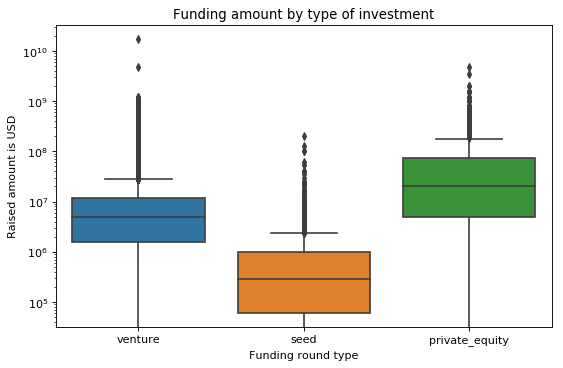

In [662]:
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='r')
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame[master_frame.funding_round_type.isin(['venture', 'private_equity', 'seed'])])
plt.yscale('log')
plt.xlabel('Funding round type')
plt.ylabel('Raised amount is USD')
plt.title('Funding amount by type of investment')
plt.show()

###### Top 9 countries against the total amount of investments of funding type venture

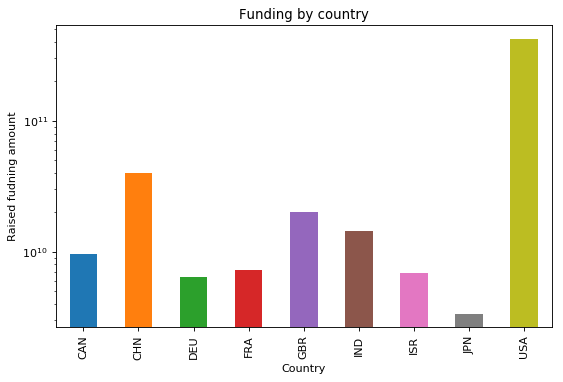

In [663]:
# investements 
plt.figure(figsize=(8, 5), dpi=80, facecolor='w', edgecolor='r')
top9_countries_data.groupby('country_code')['raised_amount_usd'].sum().plot(kind='bar')
plt.yscale('log')
plt.ylabel('Raised fudning amount')
plt.xlabel('Country')
plt.title('Funding by country')
plt.show()

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


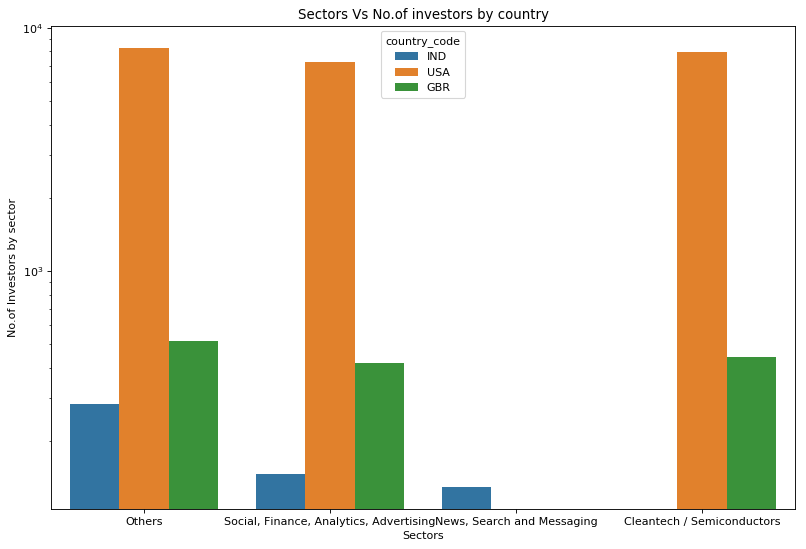

In [664]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='r')
re = pd.concat([D1,D2, D3], axis=1)
d1_top3 = D1.groupby('main_sector')['main_sector'].count().nlargest(3).index


re = D1[D1.main_sector.isin(d1_top3)]

d2_top3 = D2.groupby('main_sector')['main_sector'].count().nlargest(3).index
re = re.append(D2[D2.main_sector.isin(d2_top3)])

d3_top3 = D3.groupby('main_sector')['main_sector'].count().nlargest(3).index
re = re.append(D3[D3.main_sector.isin(d3_top3)])

sns.barplot(x='main_sector', y='no_of_invt_by_sector', hue='country_code', data=re)
plt.yscale('log')
plt.ylabel('No.of Investors by sector')
plt.xlabel('Sectors')
plt.title('Sectors Vs No.of investors by country')
plt.show()

In [390]:
D1.raised_amount_usd.size

2054

##### Q: Total amount of investment (USD)

In [391]:
D1.raised_amount_usd.sum()

20234971737.0

#####  Q: Top sector (based on count of investments)

In [392]:
no_of_investements = D1.groupby('main_sector')['primary_sector'].count().nlargest(3)
no_of_investements

main_sector
Others                                     515
Cleantech / Semiconductors                 442
Social, Finance, Analytics, Advertising    418
Name: primary_sector, dtype: int64

In [393]:
no_of_investements.index[0]

'Others'

##### Q: Second-best sector (based on count of investments)

In [394]:
no_of_investements.index[1]

'Cleantech / Semiconductors'

##### Q: Third-best sector (based on count of investments)

In [395]:
no_of_investements.index[2]

'Social, Finance, Analytics, Advertising'

##### Q: Number of investments in the top sector (refer to point 3)

In [396]:
no_of_investements[0]

515

##### Q: Number of investments in the second-best sector (refer to point 4)

In [397]:
no_of_investements[1]

442

##### Q: Number of investments in the third-best sector (refer to point 5)

In [398]:
no_of_investements[2]

418

##### Q: For the top sector count-wise (point 3), which company received the highest investment?

In [399]:
# fil_fn = lambda frame: frame.primary_sector == 'Others'
fil_fn = lambda frame: (frame.primary_sector == 'Others' )

inv_by_companies = D1[(D1.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(10)


name
Rostima                         8
Electric Cloud                  7
Helveta                         6
picoChip                        6
CriticalBlue                    5
Farfetch                        5
MyOptique Group                 5
SenSage                         5
Alfresco                        4
Cambridge Broadband Networks    4
Name: raised_amount_usd, dtype: int64

##### Q: For point 4 (second best sector count-wise), which company received the highest investment?

In [400]:
inv_by_companies = D1[(D1.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(10)

name
Green Biologics                     6
Population Genetics Technologies    6
F-star Biotechnology Limited        5
Horizon Discovery                   5
Intelligent Energy                  5
Oxford BioTherapeutics              5
Sirigen                             5
BioVex                              4
EUSA Pharma                         4
Michelson Diagnostics               4
Name: raised_amount_usd, dtype: int64

#### **Country IND stats:** 

##### Q: Total number of investments (count)

In [401]:
D2.raised_amount_usd.size

36139

##### Q: Total amount of investment (USD)

In [402]:
D2.raised_amount_usd.sum()

422510842796.0

#####  Q: Top sector (based on count of investments)

In [403]:
no_of_investements = D2.groupby('main_sector')['primary_sector'].count().nlargest(4)
no_of_investements

main_sector
Others                                     8304
Cleantech / Semiconductors                 7996
Social, Finance, Analytics, Advertising    7272
News, Search and Messaging                 4345
Name: primary_sector, dtype: int64

In [404]:
no_of_investements.index[0]

'Others'

##### Q: Second-best sector (based on count of investments)

In [405]:
no_of_investements.index[1]

'Cleantech / Semiconductors'

##### Q: Third-best sector (based on count of investments)

In [406]:
no_of_investements.index[2]

'Social, Finance, Analytics, Advertising'

##### Q: Number of investments in the top sector (refer to point 3)

In [407]:
no_of_investements[0]

8304

##### Q: Number of investments in the second-best sector (refer to point 4)

In [408]:
no_of_investements[1]

7996

##### Q: Number of investments in the third-best sector (refer to point 5)

In [409]:
no_of_investements[2]

7272

##### Q: For the top sector count-wise (point 3), which company received the highest investment?

In [410]:
inv_by_companies = D2[(D2.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Terascala       13
VectorMAX       12
Lecere          11
BTI Systems     10
Appcelerator     9
Name: raised_amount_usd, dtype: int64

##### Q: For the second-best sector count-wise (point 4), which company received the highest investment?

In [411]:
inv_by_companies = D2[(D2.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Aviir                         12
Covenant Surgical Partners    12
Galectin Therapeutics         12
Tigo Energy                   12
CNS Response                  11
Name: raised_amount_usd, dtype: int64

#### **Country UK stats:** 

##### Q: Total number of investments (count)

In [412]:
D3.raised_amount_usd.size

1256

##### Q: Total amount of investment (USD)

In [413]:
D3.raised_amount_usd.sum()

9583332317.0

#####  Q: Top sector (based on count of investments)

In [414]:
no_of_investements = D3.groupby('main_sector')['primary_sector'].count().nlargest(4)
no_of_investements

main_sector
Cleantech / Semiconductors                 331
Others                                     327
Social, Finance, Analytics, Advertising    230
News, Search and Messaging                 130
Name: primary_sector, dtype: int64

In [415]:
no_of_investements.index[0]

'Cleantech / Semiconductors'

##### Q: Second-best sector (based on count of investments)

In [416]:
no_of_investements.index[1]

'Others'

##### Q: Third-best sector (based on count of investments)

In [417]:
no_of_investements.index[2]

'Social, Finance, Analytics, Advertising'

##### Q: Number of investments in the top sector (refer to point 3)

In [418]:
no_of_investements[0]

331

##### Q: Number of investments in the second-best sector (refer to point 4)

In [419]:
no_of_investements[1]

327

##### Q: Number of investments in the third-best sector (refer to point 5)

In [420]:
no_of_investements[2]

230

##### Q: For the top sector count-wise (point 3), which company received the highest investment?

In [421]:
inv_by_companies = D3[(D3.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Amorfix Life Sciences      9
D-Wave Systems             7
Aquinox Pharmaceuticals    6
Zymeworks                  6
Enobia Pharma              5
Name: raised_amount_usd, dtype: int64

##### Q: For the second-best sector count-wise (point 4), which company received the highest investment?

In [422]:
inv_by_companies = D3[(D3.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Creation Technologies         9
HighRoads                     6
Respect Your Universe, Inc    6
Teradici                      6
BuildDirect                   5
Name: raised_amount_usd, dtype: int64

## Plottings for better Analysis:

In [424]:
df = df_by_funding_round.sum()
df


raised_amount_usd
funding_round_type                      
angel                      4651357760.00
convertible_note           2097178420.00
debt_financing           113578008437.00
equity_crowdfunding         611591405.00
grant                      9130186317.00
non_equity_assistance        30017823.00
post_ipo_debt             25643094917.00
post_ipo_equity           51490106151.00
private_equity           139668749655.00
product_crowdfunding        526168593.00
secondary_market           2364288903.00
seed                      16914199177.00
undisclosed               28694565689.00
venture                  583186576260.00

In [665]:
import matplotlib.pyplot as plt
import seaborn as sns

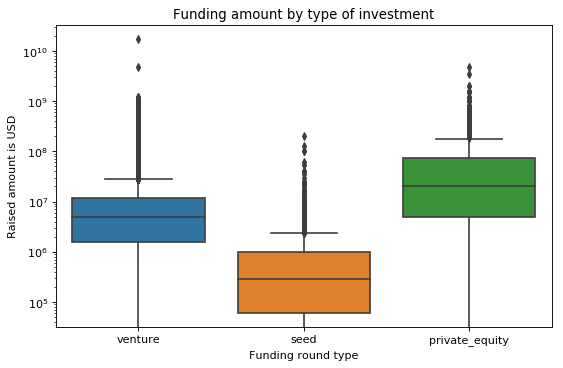

In [666]:
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='r')
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame[master_frame.funding_round_type.isin(['venture', 'private_equity', 'seed'])])
plt.yscale('log')
plt.xlabel('Funding round type')
plt.ylabel('Raised amount is USD')
plt.title('Funding amount by type of investment')
plt.show()

###### Top 9 countries against the total amount of investments of funding type venture

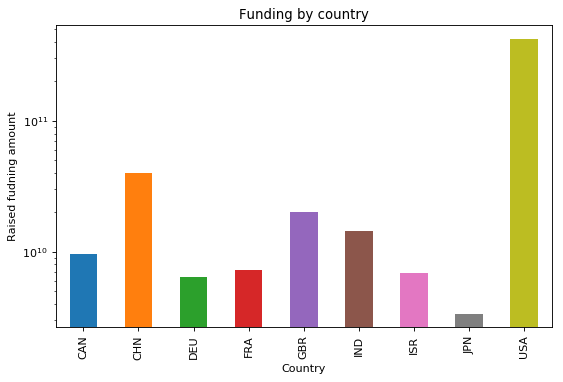

In [667]:
# investements 
plt.figure(figsize=(8, 5), dpi=80, facecolor='w', edgecolor='r')
top9_countries_data.groupby('country_code')['raised_amount_usd'].sum().plot(kind='bar')
plt.yscale('log')
plt.ylabel('Raised fudning amount')
plt.xlabel('Country')
plt.title('Funding by country')
plt.show()

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


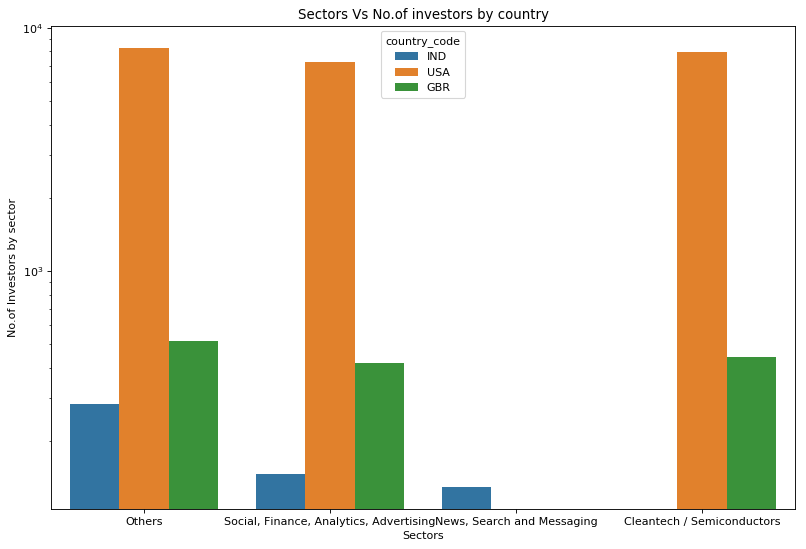

In [680]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='r')
re = pd.concat([D1,D2, D3], axis=1)
d1_top3 = D1.groupby('main_sector')['main_sector'].count().nlargest(3).index


re = D1[D1.main_sector.isin(d1_top3)]

d2_top3 = D2.groupby('main_sector')['main_sector'].count().nlargest(3).index
re = re.append(D2[D2.main_sector.isin(d2_top3)])

d3_top3 = D3.groupby('main_sector')['main_sector'].count().nlargest(3).index
re = re.append(D3[D3.main_sector.isin(d3_top3)])

sns.barplot(x='main_sector', y='no_of_invt_by_sector', hue='country_code', data=re)
plt.yscale('log')
plt.ylabel('No.of Investors by sector')
plt.xlabel('Sectors')
plt.title('Sectors Vs No.of investors by country')
plt.show()